# **Exploratory Data Analysis (EDA)**

**1. Setup & Load Data dari Google Drive**


In [24]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# path file CSV di Google Drive
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'

# Load data
import pandas as pd
df = pd.read_csv(file_path)

# Tampilkan 5 baris awal
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**2. Informasi Umum Dataset**

In [25]:
# Informasi struktur data
df.info()

# Statistik deskriptif
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Tujuan:

- Mengetahui jumlah baris/kolom

- Tipe data

- Ringkasan statistik numerik & kategorikal



**3. Pembersihan Tipe Data**

Beberapa kolom numerik terbaca sebagai object → konversi ke float.

In [26]:
# Kolom yang seharusnya numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi ke numerik
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek ulang tipe data
df.dtypes


,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


**4. Cek Missing Values, Duplikasi, dan Nilai Unik**

In [27]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

# Duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# Nilai unik per kolom
print("\nJumlah nilai unik per kolom:\n", df.nunique())


Missing Values:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah data duplikat: 18

Jumlah nilai unik per kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP        

Menampilkan nilai unik setiap kolom

In [28]:
# Tampilkan nilai unik untuk setiap kolom
for col in df.columns:
    print(f"\n- Kolom: {col}")
    print(df[col].unique())



- Kolom: Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

- Kolom: Gender
['Female' 'Male' '?' nan]

- Kolom: Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

- Kolom: Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

- Kolom: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

- Kolom: FAVC
['no' 'yes' '?' nan]

- Kolom: FCVC
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844 

cek jumlah nilai '?' sebagai missing

In [29]:
# Cek missing value implisit
(df == '?').sum()


,0
Age,0
Gender,13
Height,0
Weight,0
CALC,15
FAVC,11
FCVC,0
NCP,0
SCC,8
SMOKE,8


**5. Visualisasi Distribusi Data**

a. Histogram Kolom Numerik

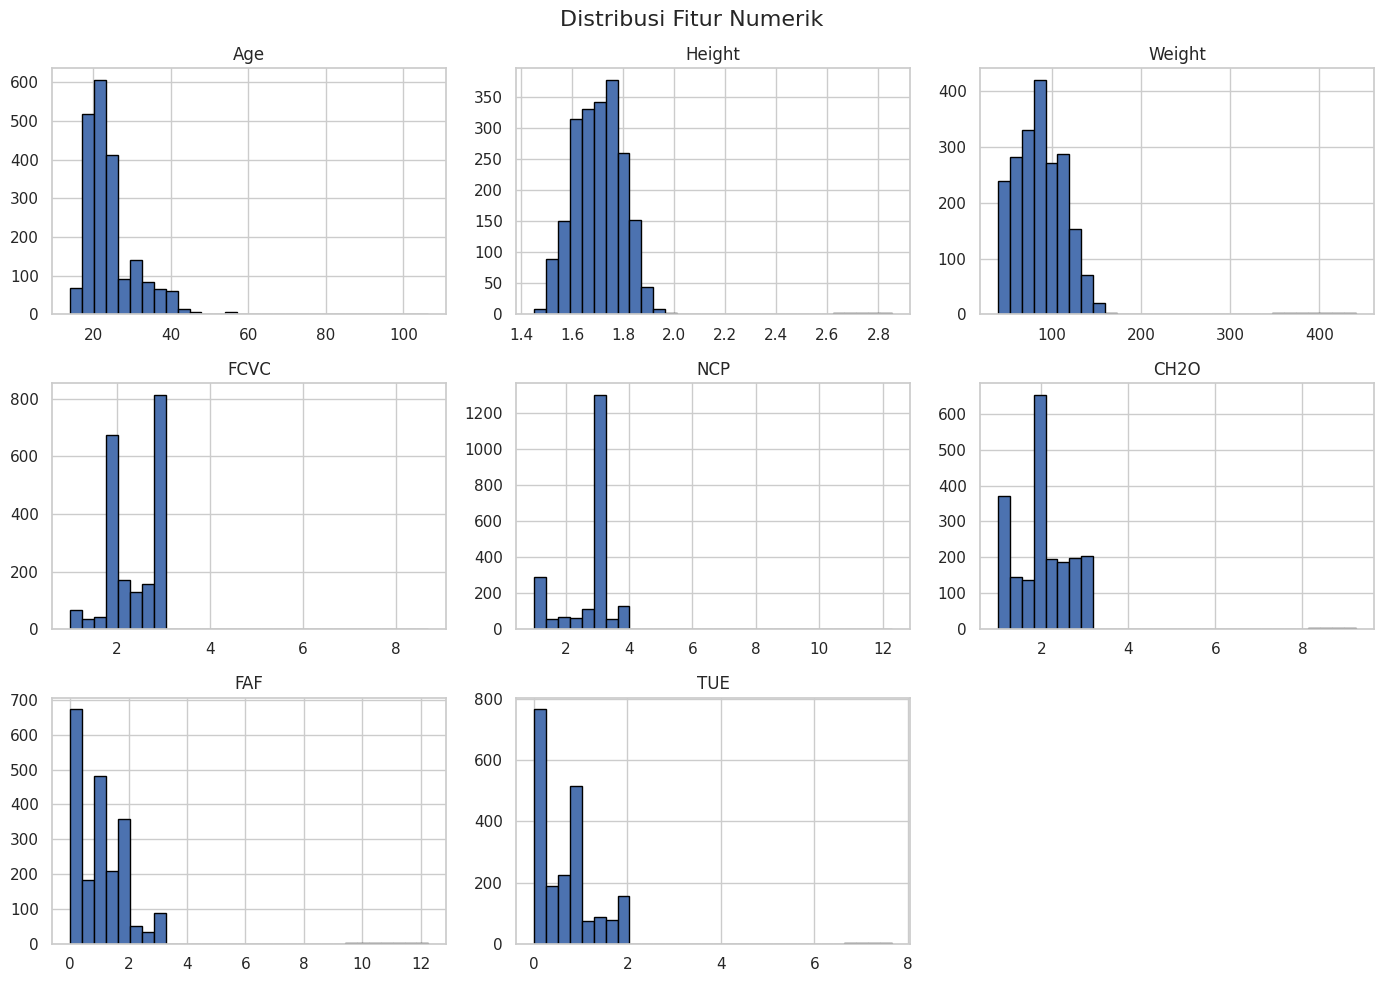

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df[numerical_cols].hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


b. Korelasi Numerik

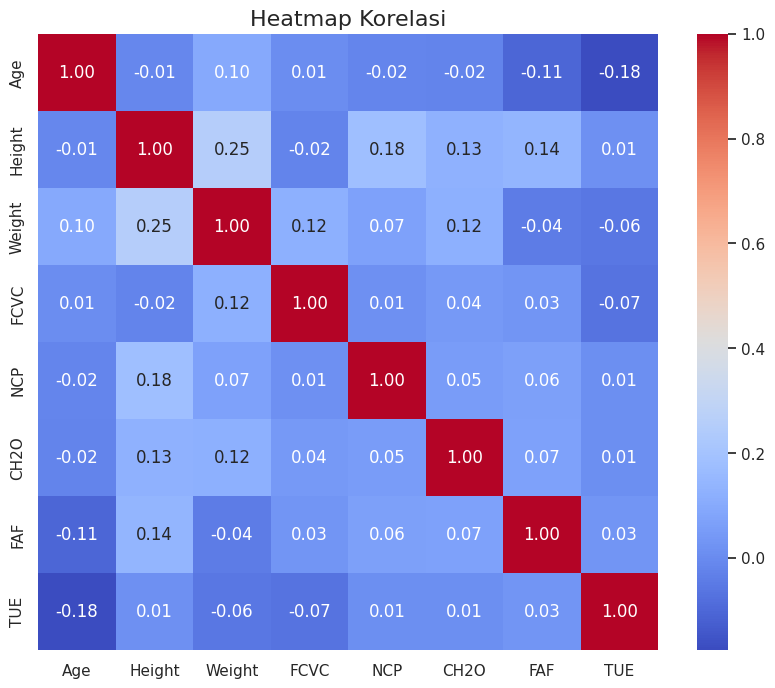

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi", fontsize=16)
plt.show()


c. Distribusi Kelas Target

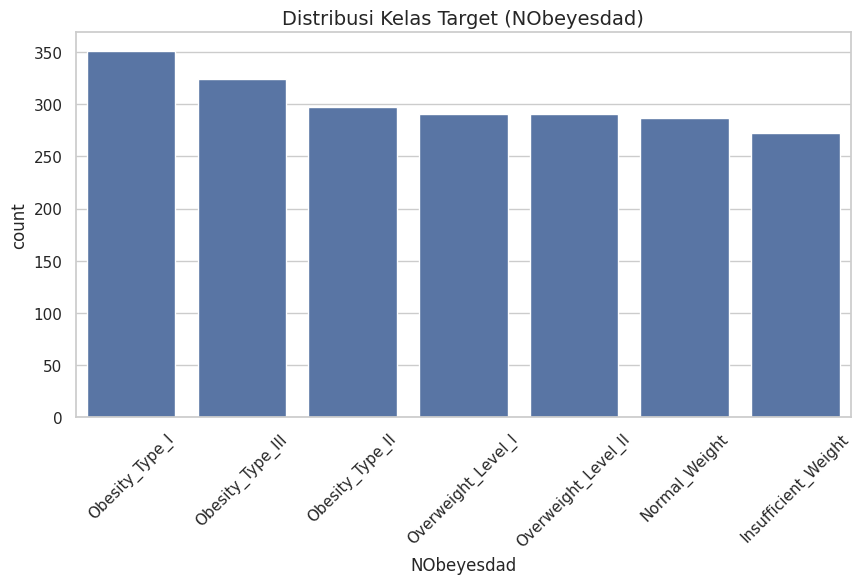

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target (NObeyesdad)", fontsize=14)
plt.show()


 **6. Deteksi Outlier (Boxplot)**

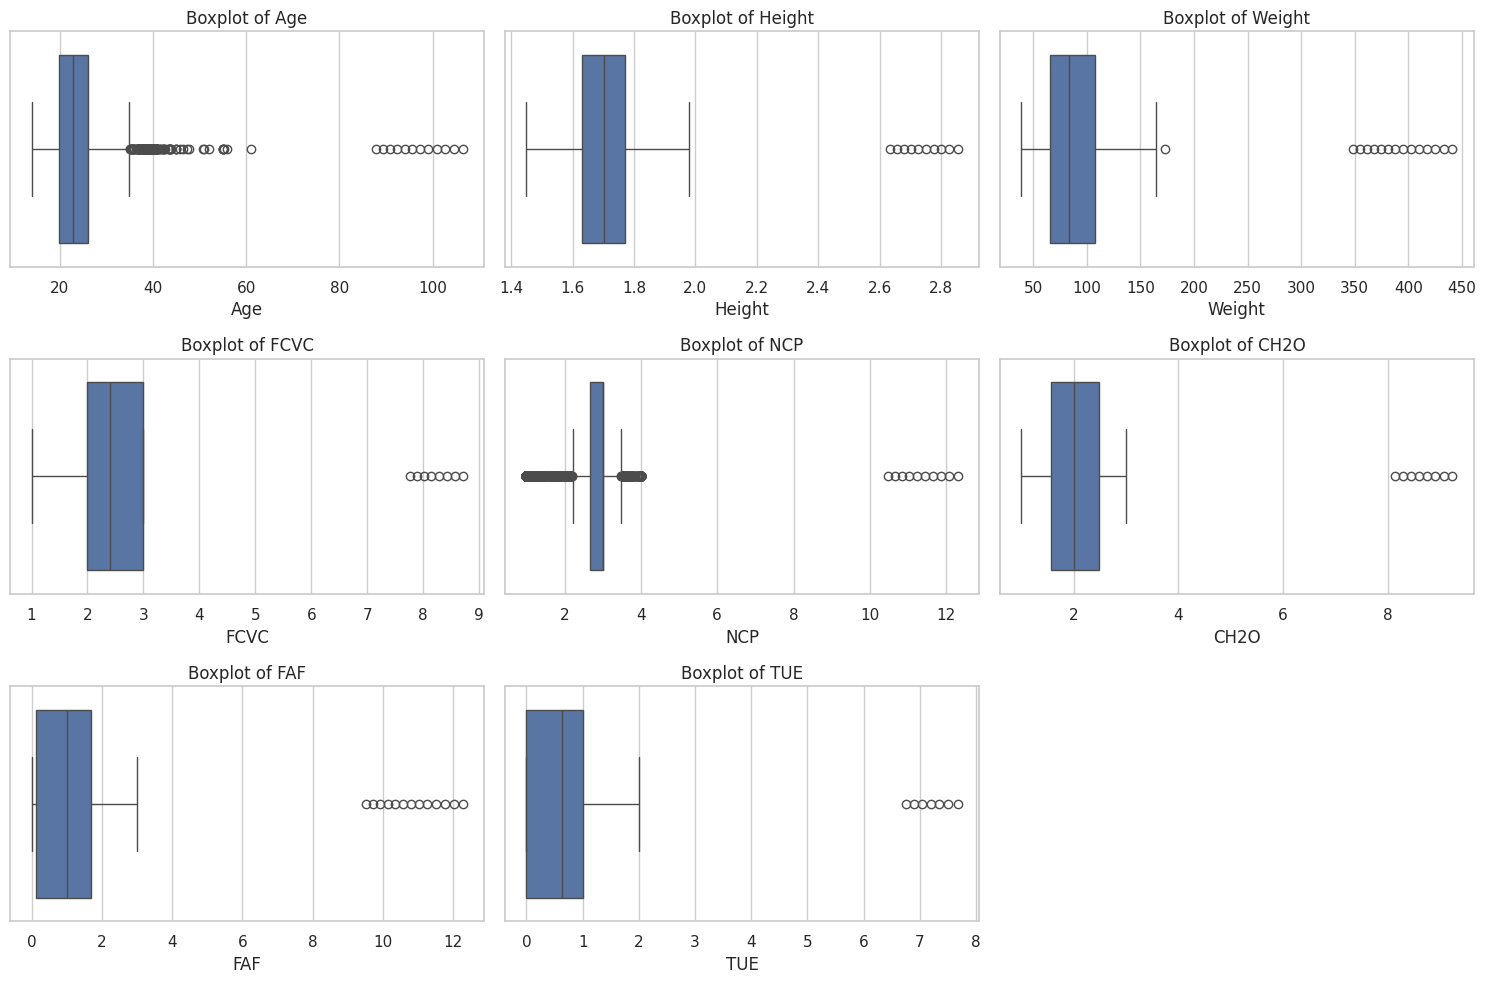

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**7. Kesimpulan**

Dataset Obesity ini cukup bersih dan informatif, namun membutuhkan beberapa tahap preprocessing sebelum modeling:

- Penanganan missing value (nilai '?' → NaN).

- Deteksi dan penanganan outlier.

- Encoding fitur kategorikal.

- Penyeimbangan kelas target.

- Standarisasi atau normalisasi fitur numerik (karena skala berbeda).

# **Preprocessing**

**1. import library yang diperlukan**

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

**2. Penanganan missing values, duplikasi, dan outlier**

In [35]:
# Ganti '?' dengan NaN

df.replace('?', np.nan, inplace=True)

In [36]:
# Imputasi missing value

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Untuk kategori → modus
    else:
        df[col] = df[col].fillna(df[col].mean())     # Untuk numerik → rata-rata


In [37]:
# Menghapus duplikat

df.drop_duplicates(inplace=True)

In [38]:
# Menangani outlier dengan metode IQR

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


**3. Encode fitur kategorikal**

In [39]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns.drop('NObeyesdad')
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

**4. Encode target label (NObeyesdad)**

In [40]:
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

**5. Pisahkan fitur dan target**

In [41]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

**6. Atasi ketidakseimbangan kelas dengan SMOTE**

In [42]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

**7. Standarisasi fitur numerik**

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

**8. Standarisasi fitur numerik**

In [44]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
final_df = X_scaled_df.copy()
final_df['NObeyesdad'] = y_balanced


**9. Gabungkan fitur dan target kembali menjadi satu dataframe**

In [45]:
print("Jumlah data setelah preprocessing:", final_df.shape)
final_df.head()

Jumlah data setelah preprocessing: (2198, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.466140,-1.080580,-1.076594,-0.858033,1.639685,-2.392010,-0.746509,0.23717,-0.220599,-0.119606,-0.046938,0.490312,-1.292760,0.489132,0.39455,0.434223,1
1,-0.466140,-1.080580,-2.218543,-1.162334,-0.423296,-2.392010,1.107350,0.23717,4.533103,8.360815,1.662097,0.490312,2.287466,-1.198740,0.39455,0.434223,1
2,0.005969,0.925429,0.978914,-0.363543,-2.486276,-2.392010,-0.746509,0.23717,-0.220599,-0.119606,-0.046938,0.490312,1.094057,0.489132,0.39455,0.434223,1
3,0.950188,0.925429,0.978914,0.016834,-2.486276,-2.392010,1.107350,0.23717,-0.220599,-0.119606,-0.046938,-2.039516,1.094057,-1.198740,0.39455,1.339746,5
4,1.422297,0.925429,-1.076594,-1.276447,-0.423296,0.418058,-0.746509,0.23717,-0.220599,-0.119606,-0.046938,-2.039516,-1.292760,-1.198740,0.39455,-2.282347,1


**10. Kesimpulan**


- Data sudah dibersihkan dari duplikasi, error (?), missing values, dan outlier.

- Semua kolom kategori telah diubah menjadi numerik.

- Ketidakseimbangan kelas pada target berhasil diatasi dengan SMOTE.

- Fitur numerik telah dinormalisasi agar memiliki skala yang sebanding.

- Dataset sekarang siap digunakan untuk modeling

# **Pemodelan dan Evaluasi**

**1. Import library yang diperlukan**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

**2. Pisahkan fitur dan target**

In [47]:
X = final_df.drop(columns='NObeyesdad')
y = final_df['NObeyesdad']

**3. Split data: 80% train, 20% test**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**4. Inisialisasi model**

In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True)
}

**5. Latih & evaluasi tiap model**

In [50]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

**6. Tampilkan metrik evaluasi setiap model**

In [51]:
for name, metrics in results.items():
    print(f"=== {name} ===")
    print("Accuracy      :", round(metrics['Accuracy'], 4))
    print("Precision     :", round(metrics['Precision'], 4))
    print("Recall        :", round(metrics['Recall'], 4))
    print("F1-score      :", round(metrics['F1-score'], 4))
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("Classification Report:\n", metrics['Classification Report'])
    print("\n")

=== Logistic Regression ===
Accuracy      : 0.8682
Precision     : 0.872
Recall        : 0.8682
F1-score      : 0.8672
Confusion Matrix:
 [[62  0  0  0  0  0  0]
 [ 8 45  0  0  0  9  1]
 [ 0  0 51  3  0  2  7]
 [ 0  0  0 63  0  0  0]
 [ 0  0  1  0 62  0  0]
 [ 0  4  0  0  0 51  8]
 [ 0  2  3  1  0  9 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        62
           1       0.88      0.71      0.79        63
           2       0.93      0.81      0.86        63
           3       0.94      1.00      0.97        63
           4       1.00      0.98      0.99        63
           5       0.72      0.81      0.76        63
           6       0.75      0.76      0.76        63

    accuracy                           0.87       440
   macro avg       0.87      0.87      0.87       440
weighted avg       0.87      0.87      0.87       440



=== Random Forest ===
Accuracy      : 0.9682
Precision     : 0.9697
Re

**7. Visualisasi Confusion Matrix semua model**

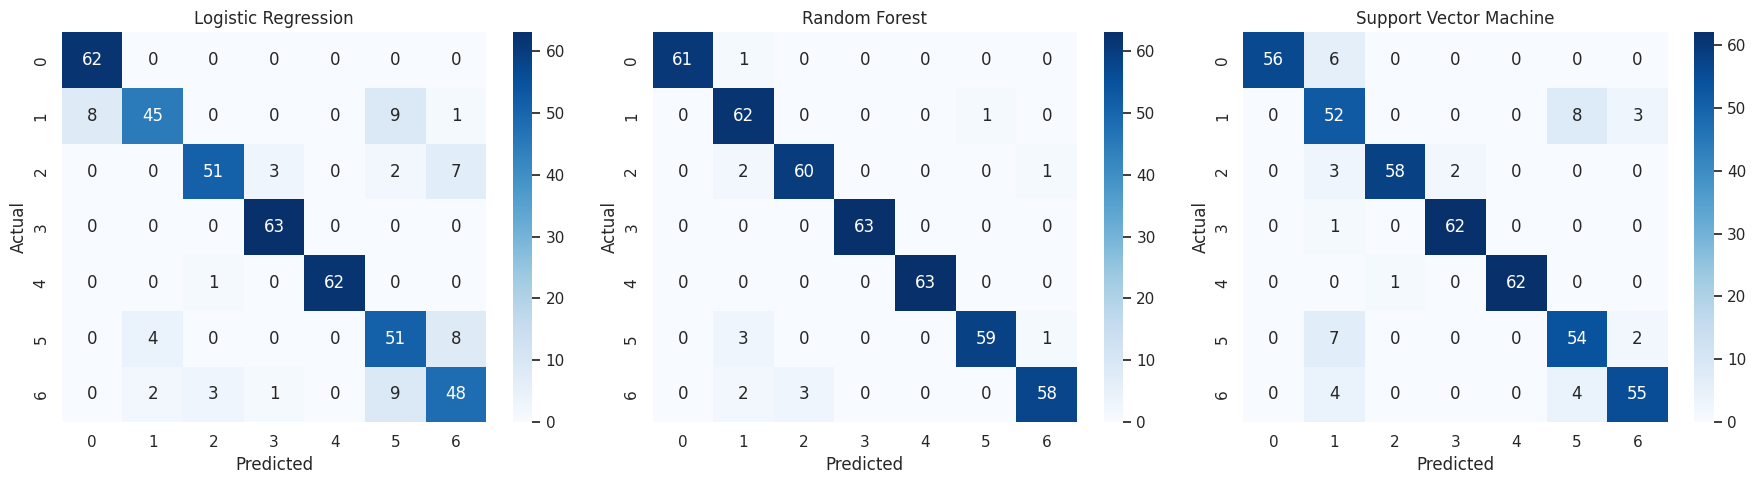

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

**8. Visualisasi Perbandingan Performa Model**

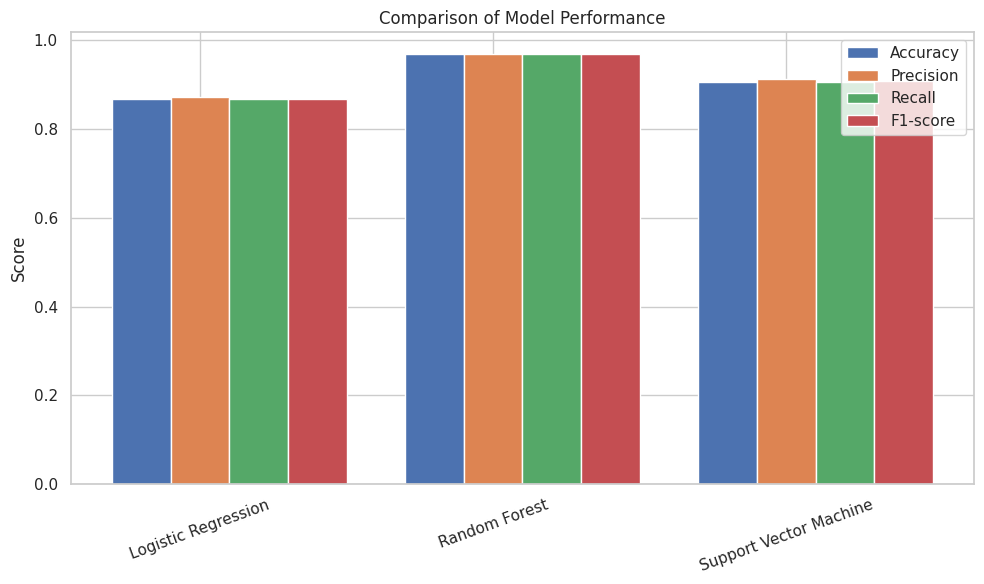

In [53]:
import numpy as np

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = list(results.keys())
scores = {metric: [results[model][metric] for model in model_names] for metric in metrics_to_plot}

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width, scores[metric], width, label=metric)

plt.xticks(x + width, model_names, rotation=20)
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

--1. Evaluasi Kualitatif dari Confusion Matrix :

a. Logistic Regression
- Beberapa kesalahan klasifikasi terlihat cukup signifikan, terutama pada kelas 1, 2, dan 6.
-Misalnya, pada kelas 1 (overweight level 1) banyak prediksi meleset ke kelas 5 dan 6.

b. Random Forest
- Hasil prediksi sangat baik dan nyaris sempurna.
-Setiap kelas hampir sepenuhnya benar terklasifikasi.
-Confusion matrix menunjukkan prediksi yang sangat presisi dan akurat.

c. SVM (Support Vector Machine)
- Hasil lebih baik dari Logistic Regression, tapi tidak seakurat Random Forest.
-Masih ada kesalahan klasifikasi di beberapa kelas, terutama kelas 0 dan 1.

--2. Evaluasi Kuantitatif dari Grafik Performa:

- Random Forest unggul di semua metrik performa.
-SVM performanya moderat, cukup baik namun masih kalah dari Random Forest.
-Logistic Regression performa paling rendah, walau masih tergolong bagus.


--3. Kesimpulan:

- Random Forest adalah model terbaik pada dataset ini, dengan akurasi dan presisi yang hampir sempurna.
-SVM adalah pilihan baik jika ingin model yang tidak terlalu kompleks namun tetap akurat.
-Logistic Regression paling ringan dan cepat, namun tidak sebaik dua model lainnya dalam klasifikasi multi-kelas ini.
-Dataset ini seimbang dan bersih, sehingga algoritma bekerja optimal setelah preprocessing.
-Semua model menunjukkan performa yang cukup baik karena preprocessing yang efektif dan fitur yang relevan.